In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("./data_1_undersampling.csv")
df1.drop(columns=['index'], inplace=True)
df1.head()

,aX,aY,aZ,aSqrt,gX,gY,gZ,mDirection,mX,mY,mZ,label
0,-16.93,-0.21,0.05,1.00,1.10,1.95,-0.37,-25.83,-22.56,46.62,34.57,0
1,-14.94,-0.34,-0.07,1.00,0.73,1.77,-0.31,-129.99,-14.25,-11.95,-85.27,0
2,-15.35,-0.88,0.41,0.95,-28.81,38.39,-22.64,96.70,71.25,-8.37,-58.77,0
3,-16.30,-0.66,-0.51,0.78,-13.98,-282.29,-135.07,-24.01,-30.88,69.33,-59.92,0
4,-15.69,-1.10,0.29,0.94,19.41,127.38,108.09,27.10,40.38,78.89,-31.11,0


In [3]:
df2 = pd.read_csv("./nol_tambahan.csv")
df2.drop(columns=['Reading ID', 'Day', 'YYYY/MM/DD', 'hh:mm:ss', 'probability'], inplace=True)
df2.head()

,aX,aY,aZ,aSqrt,gX,gY,gZ,mDirection,mX,mY,mZ,label
0,-15.57,-0.19,1.06,1.09,-0.45,0.87,0.94,-109.20,-46.37,-16.15,11.21,0
1,-15.57,-0.19,1.07,1.10,-0.39,1.24,0.98,-109.98,-45.57,-16.55,11.21,0
2,-15.62,-0.19,1.04,1.06,1.85,-3.76,3.74,-109.83,-44.77,-16.15,13.92,0
3,-15.64,-0.17,1.05,1.06,1.42,-3.28,4.05,-108.91,-45.97,-15.74,14.31,0
4,-15.57,-0.19,1.07,1.10,-0.28,-0.63,-0.04,-109.54,-45.57,-16.15,12.76,0


In [4]:
df3 = pd.read_csv("./nol_tambahan5.txt")
df3.drop(columns=['Reading ID', 'Day', 'YYYY/MM/DD', 'hh:mm:ss', 'probability'], inplace=True)
df3.head()

,aX,aY,aZ,aSqrt,gX,gY,gZ,mDirection,mX,mY,mZ,label
70,-15.97,-0.26,-1.00,1.03,0.61,2.50,9.09,-15.30,-22.56,82.48,-78.36,0
71,-15.97,-0.28,-0.99,1.03,4.70,1.46,-0.12,-13.16,-19.00,81.28,-81.82,0
72,-15.97,-0.28,-0.99,1.02,1.16,1.95,-0.18,-13.56,-20.19,83.67,-77.21,0
73,-15.97,-0.28,-1.00,1.03,1.59,2.01,-0.24,-14.33,-21.37,83.67,-80.66,0
74,-15.98,-0.28,-1.00,1.03,1.22,1.95,-0.37,-14.94,-21.37,80.09,-79.51,0


In [5]:
df = pd.concat([df1, df2, df3])

In [6]:
df

,aX,aY,aZ,aSqrt,gX,gY,gZ,mDirection,mX,mY,mZ,label
0,-16.93,-0.21,0.05,1.00,1.10,1.95,-0.37,-25.83,-22.56,46.62,34.57,0
1,-14.94,-0.34,-0.07,1.00,0.73,1.77,-0.31,-129.99,-14.25,-11.95,-85.27,0
2,-15.35,-0.88,0.41,0.95,-28.81,38.39,-22.64,96.70,71.25,-8.37,-58.77,0
3,-16.30,-0.66,-0.51,0.78,-13.98,-282.29,-135.07,-24.01,-30.88,69.33,-59.92,0
4,-15.69,-1.10,0.29,0.94,19.41,127.38,108.09,27.10,40.38,78.89,-31.11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
250,-15.78,-0.19,-1.24,1.28,69.70,8.85,8.79,-37.44,-43.94,57.38,-86.43,0
251,-15.57,-0.36,-0.02,0.38,173.03,3.91,-174.01,-86.54,-59.38,3.59,-64.53,0
252,-15.30,-0.52,-0.83,1.11,0.67,24.84,-69.89,175.63,4.75,-62.16,-43.79,0
253,-15.37,-0.39,-0.81,1.02,0.37,3.42,-0.49,175.87,4.75,-65.74,-48.40,0


### Feature Engineering

In [7]:
# calculating sliding mean

by = 3
win = 5
start = 3 ## it is the index of your 1st valid value.
new_df1 = df.rolling(win).mean()[start::by] ## calculate all, choose what you need.
new_df1.dropna(inplace=True)
new_df1

,aX,aY,aZ,aSqrt,gX,gY,gZ,mDirection,mX,mY,mZ,label
6,-15.846,-0.626,0.092,0.934,-4.310,-22.548,-9.948,-10.634,-7.362,34.902,-31.114,0.0
9,-15.346,-0.290,0.090,0.998,0.806,1.914,-0.132,-100.672,-48.686,-3.110,-8.528,0.0
12,-16.054,-0.366,0.200,1.010,-2.870,0.780,4.078,-40.688,-19.476,30.122,-9.218,0.0
15,-16.764,-0.400,0.120,0.942,-28.126,22.386,-30.066,-8.500,-10.212,67.178,-54.392,0.0
18,-15.908,-0.194,-0.042,0.888,-6.238,48.756,-3.980,-52.486,-28.972,33.230,-27.426,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
240,-15.540,-0.282,-0.220,0.996,-8.130,41.554,-6.946,-78.762,-28.264,0.238,-82.738,0.0
243,-16.616,-0.280,-0.016,1.010,-1.244,-21.790,11.608,-54.142,-45.838,31.318,-19.590,0.0
246,-16.708,-0.488,-0.056,1.024,-19.690,-28.906,40.210,-32.652,-40.850,40.164,-24.200,0.0
249,-15.996,-0.920,-0.280,1.020,13.294,-11.998,59.850,12.186,-2.376,32.272,-87.118,0.0


In [8]:
# calculating sliding standard deviation

by = 3
win = 5
start = 3

new_df2 = df.rolling(win).std()[start::by]
new_df2.dropna(inplace=True)
new_df2.drop(columns=['label'], inplace=True)
new_df2.columns = ['aX_std', 'aY_std', 'aZ_std', 'aSqrt_std', 'gX_std', 'gY_std', 'gZ_std', 'mDirection_std', 'mX_std', 'mY_std', 'mZ_std']
new_df2

,aX_std,aY_std,aZ_std,aSqrt_std,gX_std,gY_std,gZ_std,mDirection_std,mX_std,mY_std,mZ_std
6,0.780468,0.381811,0.363483,0.090443,18.104686,153.990432,86.523380,75.417745,59.804263,41.626997,44.680796
9,0.885539,0.054314,0.141951,0.004472,0.231149,0.108995,0.160997,31.082119,17.594035,26.696943,57.196432
12,1.022316,0.250559,0.295888,0.028284,8.159084,2.383065,9.628023,61.658432,35.796985,42.811755,54.810874
15,0.176862,0.247689,0.337861,0.110995,49.915393,30.912751,51.971616,26.645231,30.001208,23.523080,28.961659
18,0.859314,0.338423,0.400587,0.169027,7.485544,97.424188,56.108846,50.910105,20.200195,49.245593,54.034825
...,...,...,...,...,...,...,...,...,...,...,...
240,0.768863,0.084380,0.607083,0.039749,37.589082,170.648618,41.252680,53.912596,14.283534,30.991286,54.145286
243,0.652557,0.067454,0.499830,0.023452,28.508548,51.514417,20.139356,24.011777,21.168461,16.934978,49.551977
246,0.485664,0.463810,0.120333,0.027928,34.010085,43.089468,90.310230,48.987165,44.754515,7.252691,44.450231
249,0.503865,0.419940,0.392237,0.031623,87.808752,68.750718,89.222951,52.312720,43.530088,16.628353,47.926006


In [9]:
new_df = pd.concat([new_df1, new_df2], axis=1)
new_df

,aX,aY,aZ,aSqrt,gX,gY,gZ,mDirection,mX,mY,...,aY_std,aZ_std,aSqrt_std,gX_std,gY_std,gZ_std,mDirection_std,mX_std,mY_std,mZ_std
6,-15.846,-0.626,0.092,0.934,-4.310,-22.548,-9.948,-10.634,-7.362,34.902,...,0.381811,0.363483,0.090443,18.104686,153.990432,86.523380,75.417745,59.804263,41.626997,44.680796
9,-15.346,-0.290,0.090,0.998,0.806,1.914,-0.132,-100.672,-48.686,-3.110,...,0.054314,0.141951,0.004472,0.231149,0.108995,0.160997,31.082119,17.594035,26.696943,57.196432
12,-16.054,-0.366,0.200,1.010,-2.870,0.780,4.078,-40.688,-19.476,30.122,...,0.250559,0.295888,0.028284,8.159084,2.383065,9.628023,61.658432,35.796985,42.811755,54.810874
15,-16.764,-0.400,0.120,0.942,-28.126,22.386,-30.066,-8.500,-10.212,67.178,...,0.247689,0.337861,0.110995,49.915393,30.912751,51.971616,26.645231,30.001208,23.523080,28.961659
18,-15.908,-0.194,-0.042,0.888,-6.238,48.756,-3.980,-52.486,-28.972,33.230,...,0.338423,0.400587,0.169027,7.485544,97.424188,56.108846,50.910105,20.200195,49.245593,54.034825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,-15.540,-0.282,-0.220,0.996,-8.130,41.554,-6.946,-78.762,-28.264,0.238,...,0.084380,0.607083,0.039749,37.589082,170.648618,41.252680,53.912596,14.283534,30.991286,54.145286
243,-16.616,-0.280,-0.016,1.010,-1.244,-21.790,11.608,-54.142,-45.838,31.318,...,0.067454,0.499830,0.023452,28.508548,51.514417,20.139356,24.011777,21.168461,16.934978,49.551977
246,-16.708,-0.488,-0.056,1.024,-19.690,-28.906,40.210,-32.652,-40.850,40.164,...,0.463810,0.120333,0.027928,34.010085,43.089468,90.310230,48.987165,44.754515,7.252691,44.450231
249,-15.996,-0.920,-0.280,1.020,13.294,-11.998,59.850,12.186,-2.376,32.272,...,0.419940,0.392237,0.031623,87.808752,68.750718,89.222951,52.312720,43.530088,16.628353,47.926006


In [11]:
new_df.drop(columns=['aY', 'aZ', 'mDirection', 'mX', 'mY', 'mZ', 'aX_std', 'aY_std', 'mDirection_std', 'mX_std', 'mY_std', 'mZ_std'], inplace=True)
new_df

,aX,aSqrt,gX,gY,gZ,label,aZ_std,aSqrt_std,gX_std,gY_std,gZ_std
6,-15.846,0.934,-4.310,-22.548,-9.948,0.0,0.363483,0.090443,18.104686,153.990432,86.523380
9,-15.346,0.998,0.806,1.914,-0.132,0.0,0.141951,0.004472,0.231149,0.108995,0.160997
12,-16.054,1.010,-2.870,0.780,4.078,0.0,0.295888,0.028284,8.159084,2.383065,9.628023
15,-16.764,0.942,-28.126,22.386,-30.066,0.0,0.337861,0.110995,49.915393,30.912751,51.971616
18,-15.908,0.888,-6.238,48.756,-3.980,0.0,0.400587,0.169027,7.485544,97.424188,56.108846
...,...,...,...,...,...,...,...,...,...,...,...
240,-15.540,0.996,-8.130,41.554,-6.946,0.0,0.607083,0.039749,37.589082,170.648618,41.252680
243,-16.616,1.010,-1.244,-21.790,11.608,0.0,0.499830,0.023452,28.508548,51.514417,20.139356
246,-16.708,1.024,-19.690,-28.906,40.210,0.0,0.120333,0.027928,34.010085,43.089468,90.310230
249,-15.996,1.020,13.294,-11.998,59.850,0.0,0.392237,0.031623,87.808752,68.750718,89.222951


In [10]:
new_df.label.value_counts()

0.0    359
1.0    170
0.6      4
0.2      2
0.8      2
0.4      2
Name: label, dtype: int64

In [12]:
new_df['label'] = new_df['label'].apply(lambda x: 1 if x > 0.5 else 0)

In [13]:
new_df.label.value_counts()

0    363
1    176
Name: label, dtype: int64

# Training

In [14]:
X = new_df.drop(columns="label")
y = new_df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((431, 10), (108, 10), (431,), (108,))

In [15]:
from sklearn.ensemble import RandomForestClassifier

# df1 df2, label 1 4/5 (folder 6)
clf = RandomForestClassifier(max_depth=64, max_features=0.9454327638424945, min_samples_leaf=4, n_estimators=119)

rf = clf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

### Evaluating Model

<function matplotlib.pyplot.show(*args, **kw)>

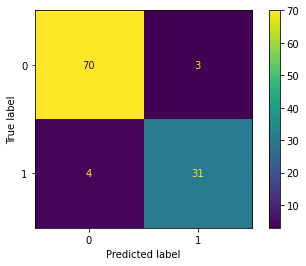

In [16]:
from sklearn.metrics import plot_confusion_matrix,r2_score,accuracy_score, confusion_matrix,classification_report
plot_confusion_matrix(rf, X_test, y_test) 
plt.show

In [17]:
#cek akurasi dan nilai precision, recall, f1 hasil klasifikasi svm

accuracy = accuracy_score(y_test, y_predict)

report = classification_report(y_test, y_predict, target_names = ['0', '1'])
    
print("akurasi model adalah: ",accuracy)
print(report)

akurasi model adalah:  0.9351851851851852
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1       0.91      0.89      0.90        35

    accuracy                           0.94       108
   macro avg       0.93      0.92      0.93       108
weighted avg       0.93      0.94      0.93       108



In [19]:
X

,aX,aSqrt,gX,gY,gZ,aZ_std,aSqrt_std,gX_std,gY_std,gZ_std
6,-15.846,0.934,-4.310,-22.548,-9.948,0.363483,0.090443,18.104686,153.990432,86.523380
9,-15.346,0.998,0.806,1.914,-0.132,0.141951,0.004472,0.231149,0.108995,0.160997
12,-16.054,1.010,-2.870,0.780,4.078,0.295888,0.028284,8.159084,2.383065,9.628023
15,-16.764,0.942,-28.126,22.386,-30.066,0.337861,0.110995,49.915393,30.912751,51.971616
18,-15.908,0.888,-6.238,48.756,-3.980,0.400587,0.169027,7.485544,97.424188,56.108846
...,...,...,...,...,...,...,...,...,...,...
240,-15.540,0.996,-8.130,41.554,-6.946,0.607083,0.039749,37.589082,170.648618,41.252680
243,-16.616,1.010,-1.244,-21.790,11.608,0.499830,0.023452,28.508548,51.514417,20.139356
246,-16.708,1.024,-19.690,-28.906,40.210,0.120333,0.027928,34.010085,43.089468,90.310230
249,-15.996,1.020,13.294,-11.998,59.850,0.392237,0.031623,87.808752,68.750718,89.222951


In [18]:
# 3/5
from micromlgen import port
print(port(rf))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[2] = { 0 };
                        // tree #1
                        if (x[6] <= 0.2539448067545891) {
                            if (x[2] <= 58.790000915527344) {
                                if (x[9] <= 114.77141571044922) {
                                    if (x[1] <= 1.0929999947547913) {
                                        if (x[5] <= 0.0077188340947031975) {
                                            if (x[9] <= 0.20769958943128586) {
                                                votes[0] += 1;
                                            }

                                            else {
                                         